# Regression between sea level height and the nearest wind stress data point for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [2]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'historical' # For data_type choose ['historical', 'piControl', 'ssp119', 'ssp126', 'ssp245' 'ssp370', 'ssp585']
model = 'NearestPoint'

#### Import and plot cmip6 sea level data (zos) and wind data historical

In [3]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [4]:
zos.zos

<xarray.DataArray 'zos' (station: 7, model: 51, time: 165)>
array([[[-2.968779, -0.916701, ...,  2.44577 ,  6.752422],
        [ 5.187391,  5.653142, ...,  6.599367,  3.661862],
        ...,
        [ 1.739577, -1.595436, ...,  0.341929, -1.614   ],
        [ 4.812175,  4.525625, ..., -3.034698, -2.654772]],

       [[-2.968779, -0.916701, ...,  2.44577 ,  6.752422],
        [ 5.187391,  5.653142, ...,  6.599367,  3.661862],
        ...,
        [ 1.739577, -1.595436, ...,  0.341929, -1.614   ],
        [ 4.812175,  4.525625, ..., -3.034698, -2.654772]],

       ...,

       [[-3.628358,  0.425936, ...,  4.234402,  7.748919],
        [ 6.26586 ,  5.828804, ...,  6.087028,  2.669368],
        ...,
        [ 4.224892,  1.508158, ...,  4.325192, -0.315416],
        [ 1.578135,  2.726276, ..., -4.703424, -3.846786]],

       [[-3.425896,  0.016901, ...,  3.855741,  7.528384],
        [ 5.986613,  6.086028, ...,  6.06833 ,  2.592195],
        ...,
        [ 3.410599, -0.178331, ...,  3.315073, -0.922042],
        [ 3.292033,  3.575261, ..., -3.951304, -3.087914]]])
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) object 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Attributes:
    units:              cm
    long_name:          Ocean dynamic sea level
    ref_period:         The folowing reference period 1986-2005, including 20...
    regridding_method:  xESMF package with bilinear
    variant:            r1i1p1f1
    branching_method:   unsing_branching_time
    detrending_order:   1
    station:            Vlissingen
    lat:                51.5
    lon:                3.5

In [5]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [6]:
wind_data

<xarray.Dataset>
Dimensions:  (model: 43, station: 7, time: 165)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Data variables:
    u2       (station, model, time) float64 1.156 2.371 4.902 ... 2.99 2.639
    v2       (station, model, time) float64 0.1447 -0.009939 ... 0.07473

### Select same models for both variables

In [137]:
# Only use models occuring in both datasets
models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CMCC-CM2-SR5', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'GFDL-CM4', 'GFDL-ESM4',
       'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC-ES2L', 'MIROC6',
       'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
       'NESM3', 'NorCPM1', 'UKESM1-0-LL']
zos = zos.where(zos.model.isin(models), drop=True)
wind_data = wind_data.where(wind_data.model.isin(models), drop=True)

### Plot data

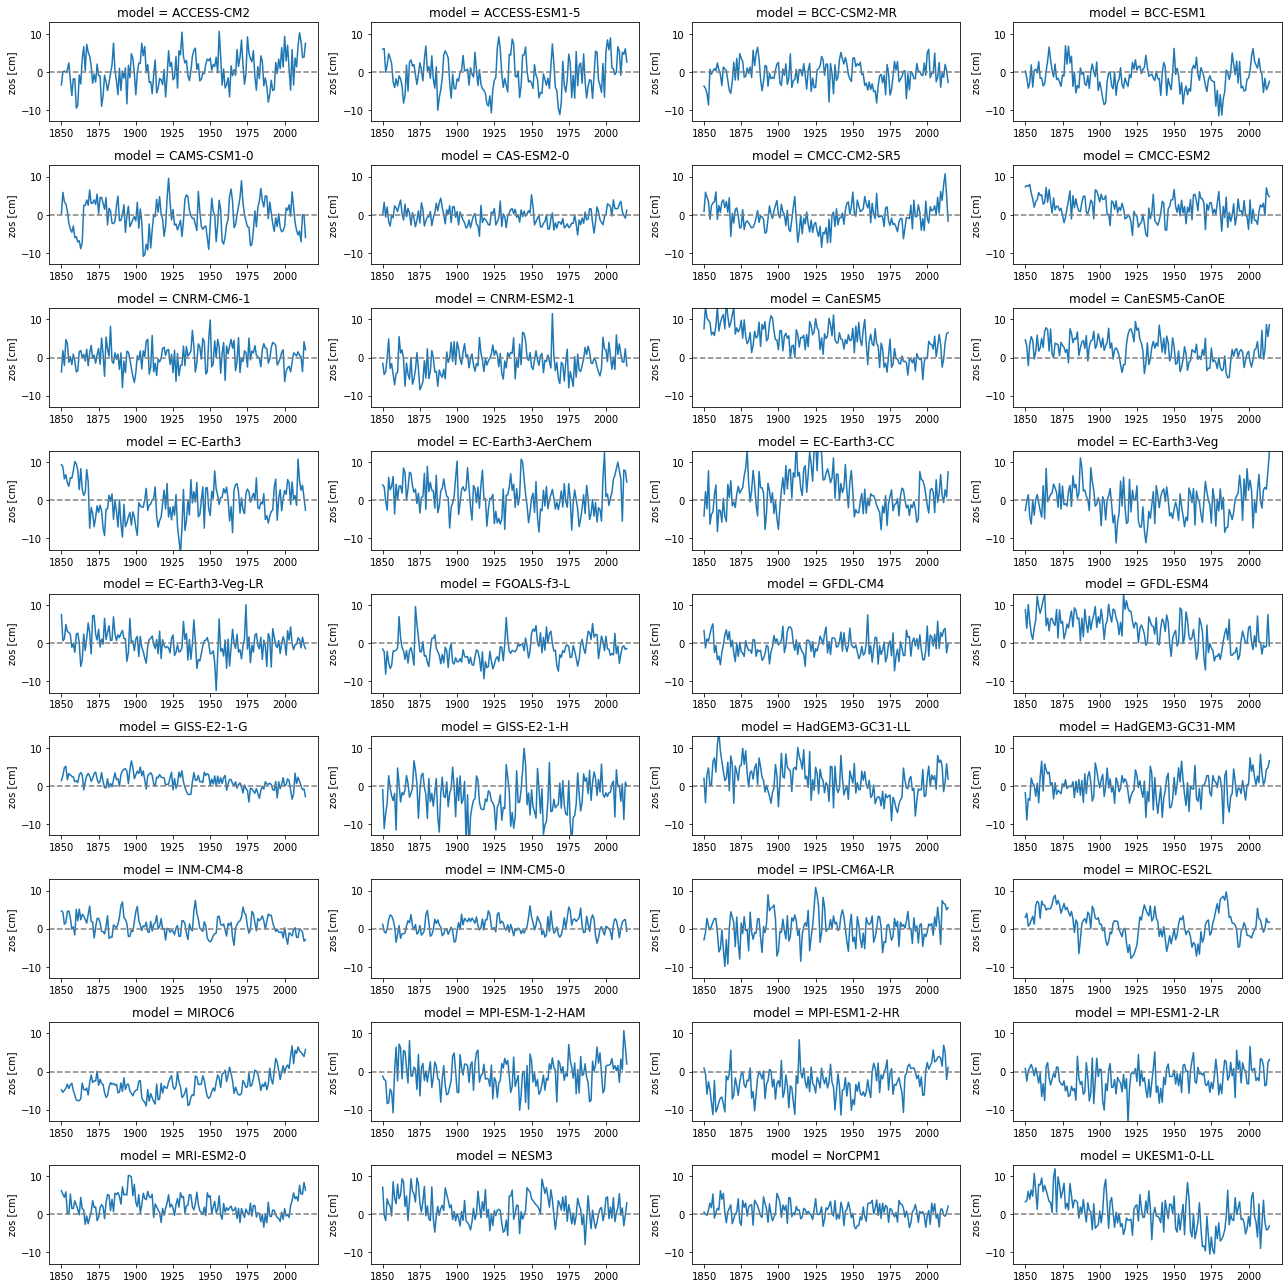

In [138]:
figs.plot_zos_data_per_model(zos, data_type)

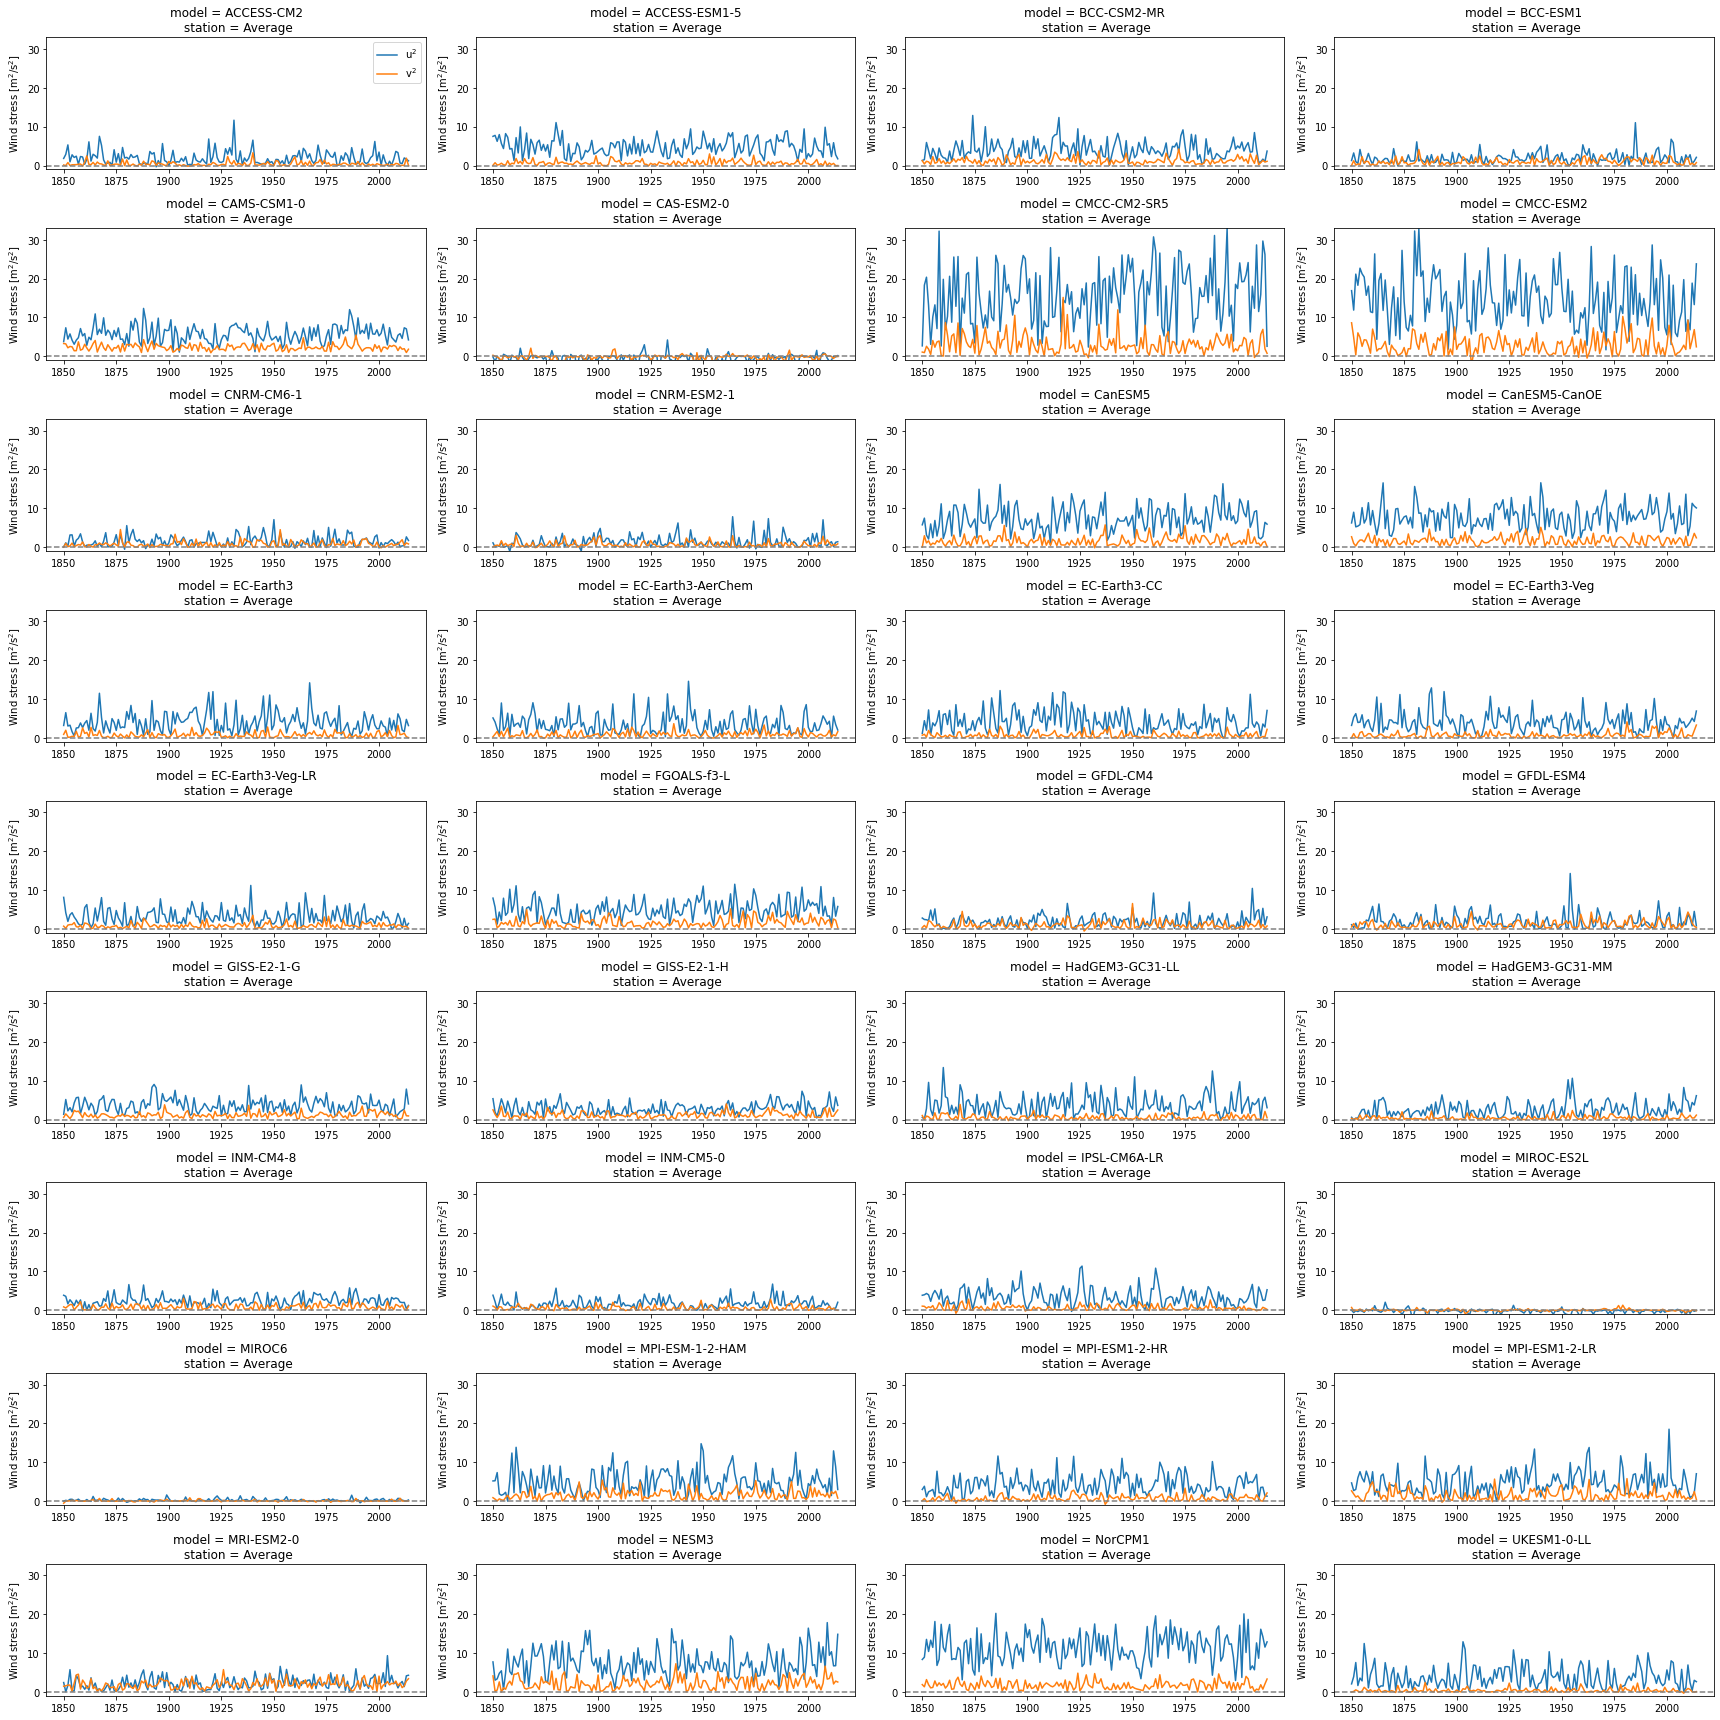

In [139]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type)

### Perform regression

In [140]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [141]:
timeseries 

<xarray.Dataset>
Dimensions:     (model: 36, station: 7, time: 165)
Coordinates:
  * time        (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station     (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    u2          (model, station, time) float64 -0.5098 0.7965 ... -0.649 -0.9302
    v2          (model, station, time) float64 0.7675 1.143 ... -0.7671 -0.5397
    trend       (model, station, time) float64 -2.119 -2.093 ... -4.208 -4.259
    total       (model, station, time) float64 -1.862 -0.1536 ... -5.624 -5.729
    wind_total  (model, station, time) float64 0.2577 1.94 ... -1.416 -1.47

In [142]:
results

<xarray.Dataset>
Dimensions:   (model: 36, station: 7)
Coordinates:
  * station   (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model     (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    r2        (model, station) float64 0.252 0.274 0.3219 ... 0.6632 0.6276
    r2_wind   (model, station) float64 0.1534 0.1744 0.2467 ... 0.4428 0.3377
    r2_u2     (model, station) float64 0.05576 0.06287 0.1736 ... 0.4052 0.3165
    r2_v2     (model, station) float64 0.03835 0.04336 0.01679 ... 0.1575 0.1029
    rmse      (model, station) float64 3.383 3.333 3.506 ... 2.937 2.808 2.804
    constant  (model, station) float64 0.3237 0.3237 0.5723 ... -0.03851 0.327
    u2        (model, station) float64 1.546 1.645 2.219 ... 2.576 2.657 2.228
    v2        (model, station) float64 -1.357 -1.454 -1.22 ... 0.9406 1.09 0.846
    trend     (model, station) float64 1.231 1.236 1.169 ... -2.272 -2.474

In [143]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

u$^2$  v$^2$  trend  total  wind total
model                                                    
ACCESS-CM2          True  False   True   True        True
ACCESS-ESM1-5       True   True  False   True        True
BCC-CSM2-MR         True   True  False   True        True
BCC-ESM1            True   True  False   True        True
CAMS-CSM1-0         True  False  False   True        True
CAS-ESM2-0          True  False  False   True        True
CMCC-CM2-SR5        True   True  False   True        True
CMCC-ESM2           True   True   True   True        True
CNRM-CM6-1          True   True  False   True        True
CNRM-ESM2-1         True   True   True   True        True
CanESM5             True   True   True   True        True
CanESM5-CanOE       True   True   True   True        True
EC-Earth3           True   True  False   True        True
EC-Earth3-AerChem   True   True  False   True        True
EC-Earth3-CC        True   True  False   True        True
EC-Earth3-Veg       True   True  False   True        True
EC-Earth3-Veg-LR    True   True   True   True        True
FGOALS-f3-L         True  False   True   True        True
GFDL-CM4            True  False  False   True        True
GFDL-ESM4           True   True   True   True        True
GISS-E2-1-G         True  False   True   True        True
GISS-E2-1-H         True  False  False   True        True
HadGEM3-GC31-LL     True   True   True   True        True
HadGEM3-GC31-MM     True   True  False   True        True
INM-CM4-8           True  False   True   True        True
INM-CM5-0           True  False  False   True        True
IPSL-CM6A-LR        True   True  False   True        True
MIROC-ES2L          True   True   True   True        True
MIROC6              True  False   True   True        True
MPI-ESM-1-2-HAM     True   True  False   True        True
MPI-ESM1-2-HR       True  False   True   True        True
MPI-ESM1-2-LR       True   True   True   True        True
MRI-ESM2-0          True   True   True   True        True
NESM3               True   True   True   True        True
NorCPM1             True   True   True   True        True
UKESM1-0-LL         True   True   True   True        True

#### Plot regression results

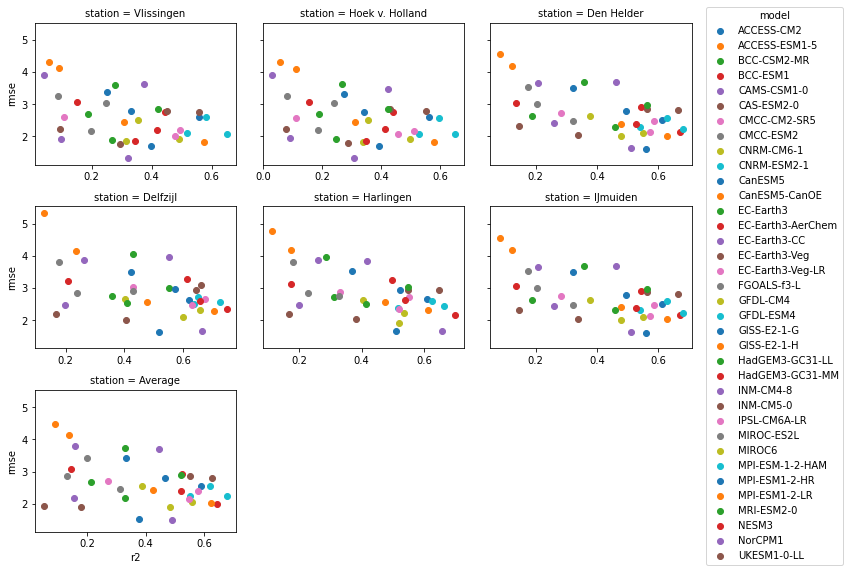

In [144]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

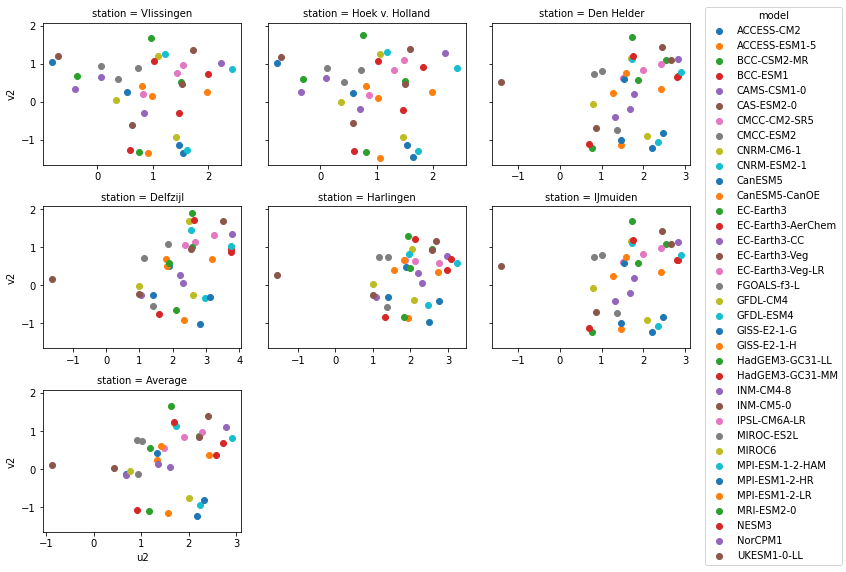

In [145]:
figs.plot_cmip6_two_variables(results, 'u2', 'v2', data_type)

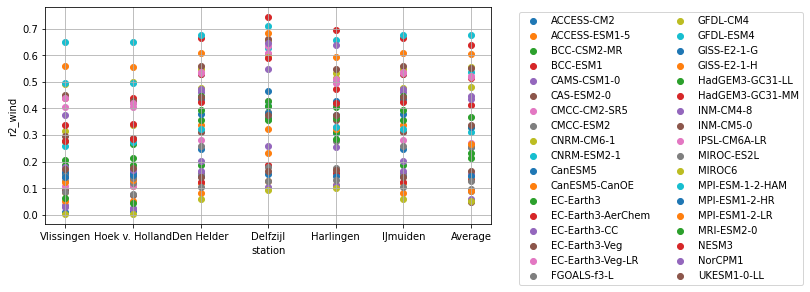

In [146]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type)

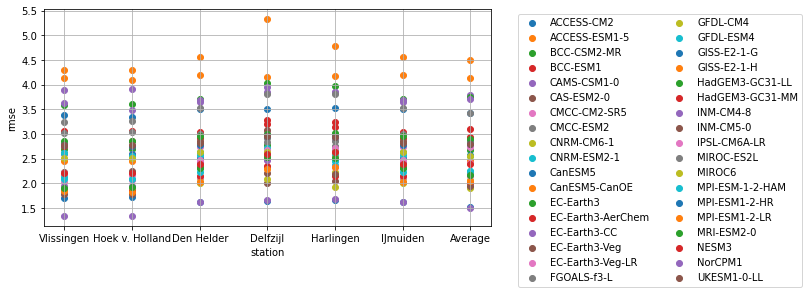

In [147]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

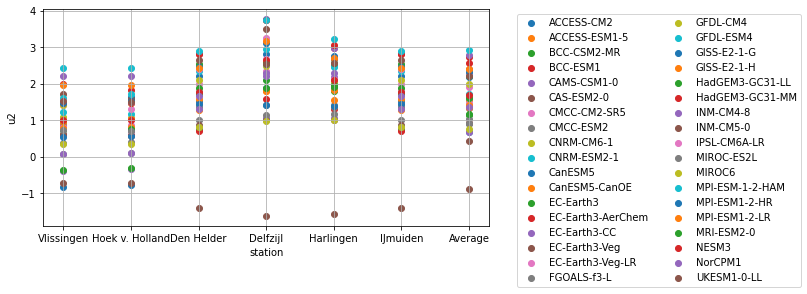

In [148]:
figs.plot_cmip6_result_per_station(results, 'u2', data_type)

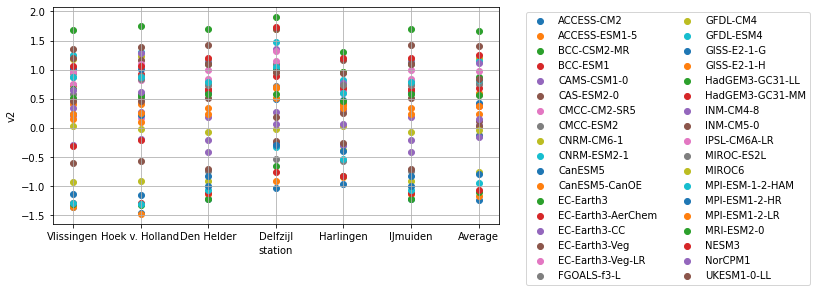

In [149]:
figs.plot_cmip6_result_per_station(results, 'v2', data_type)

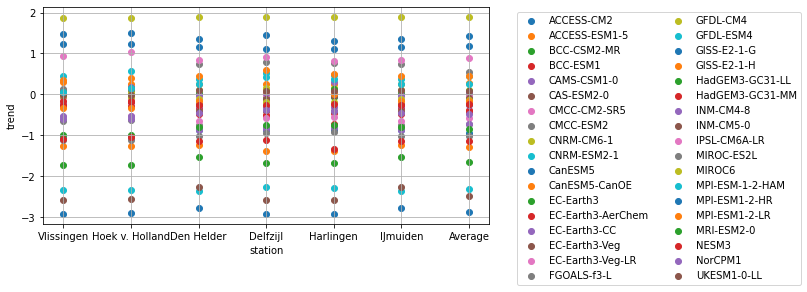

In [150]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

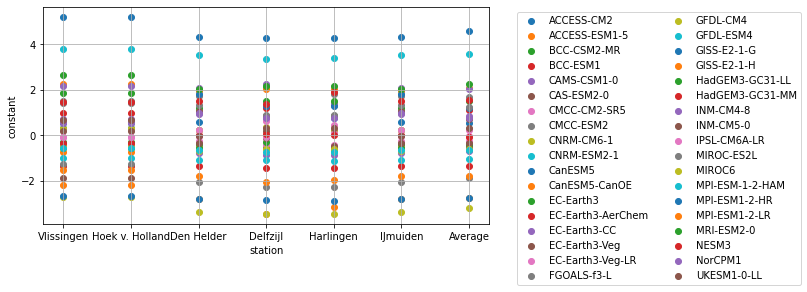

In [151]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

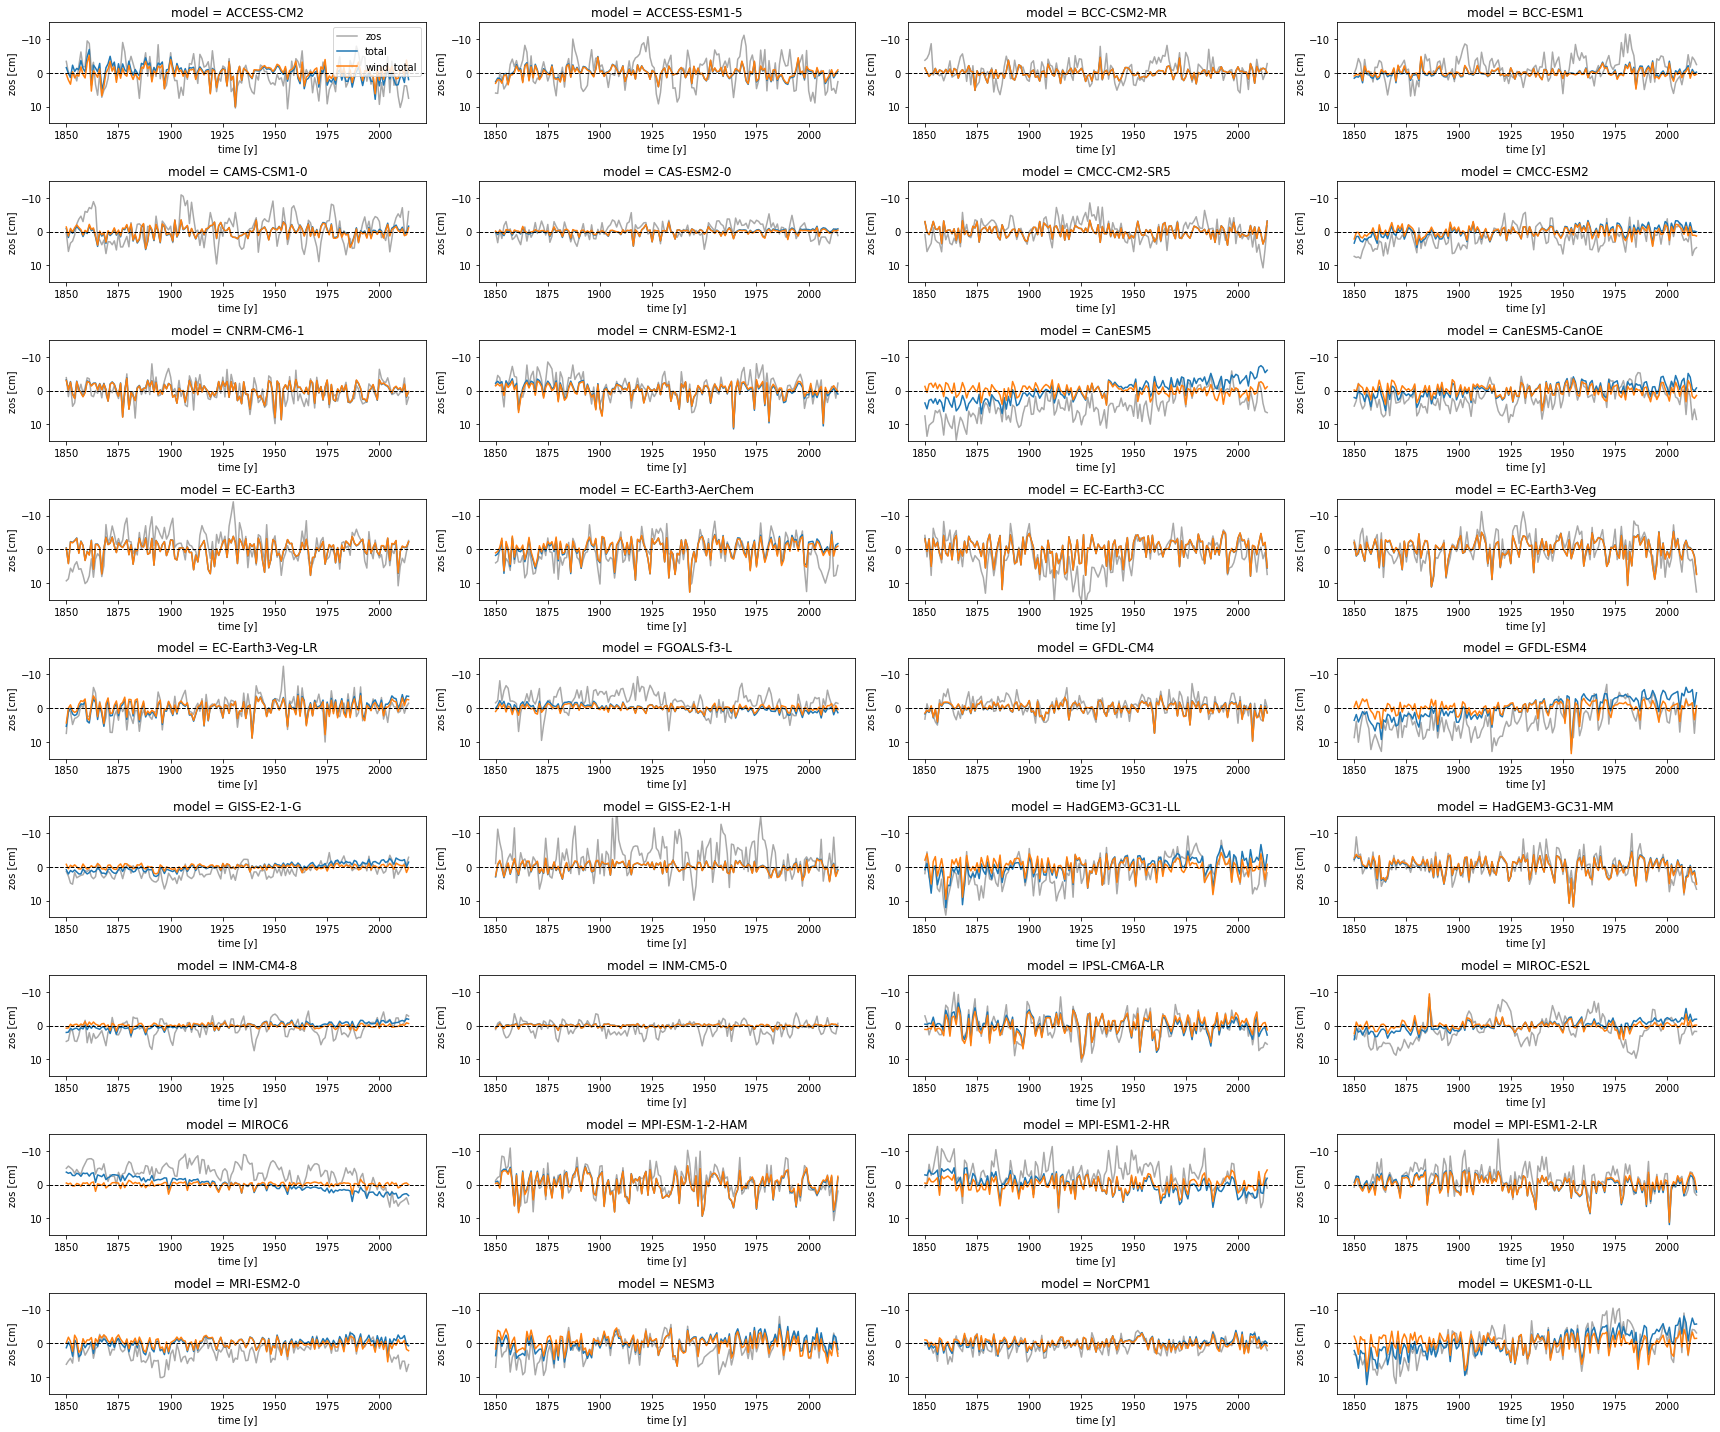

In [152]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

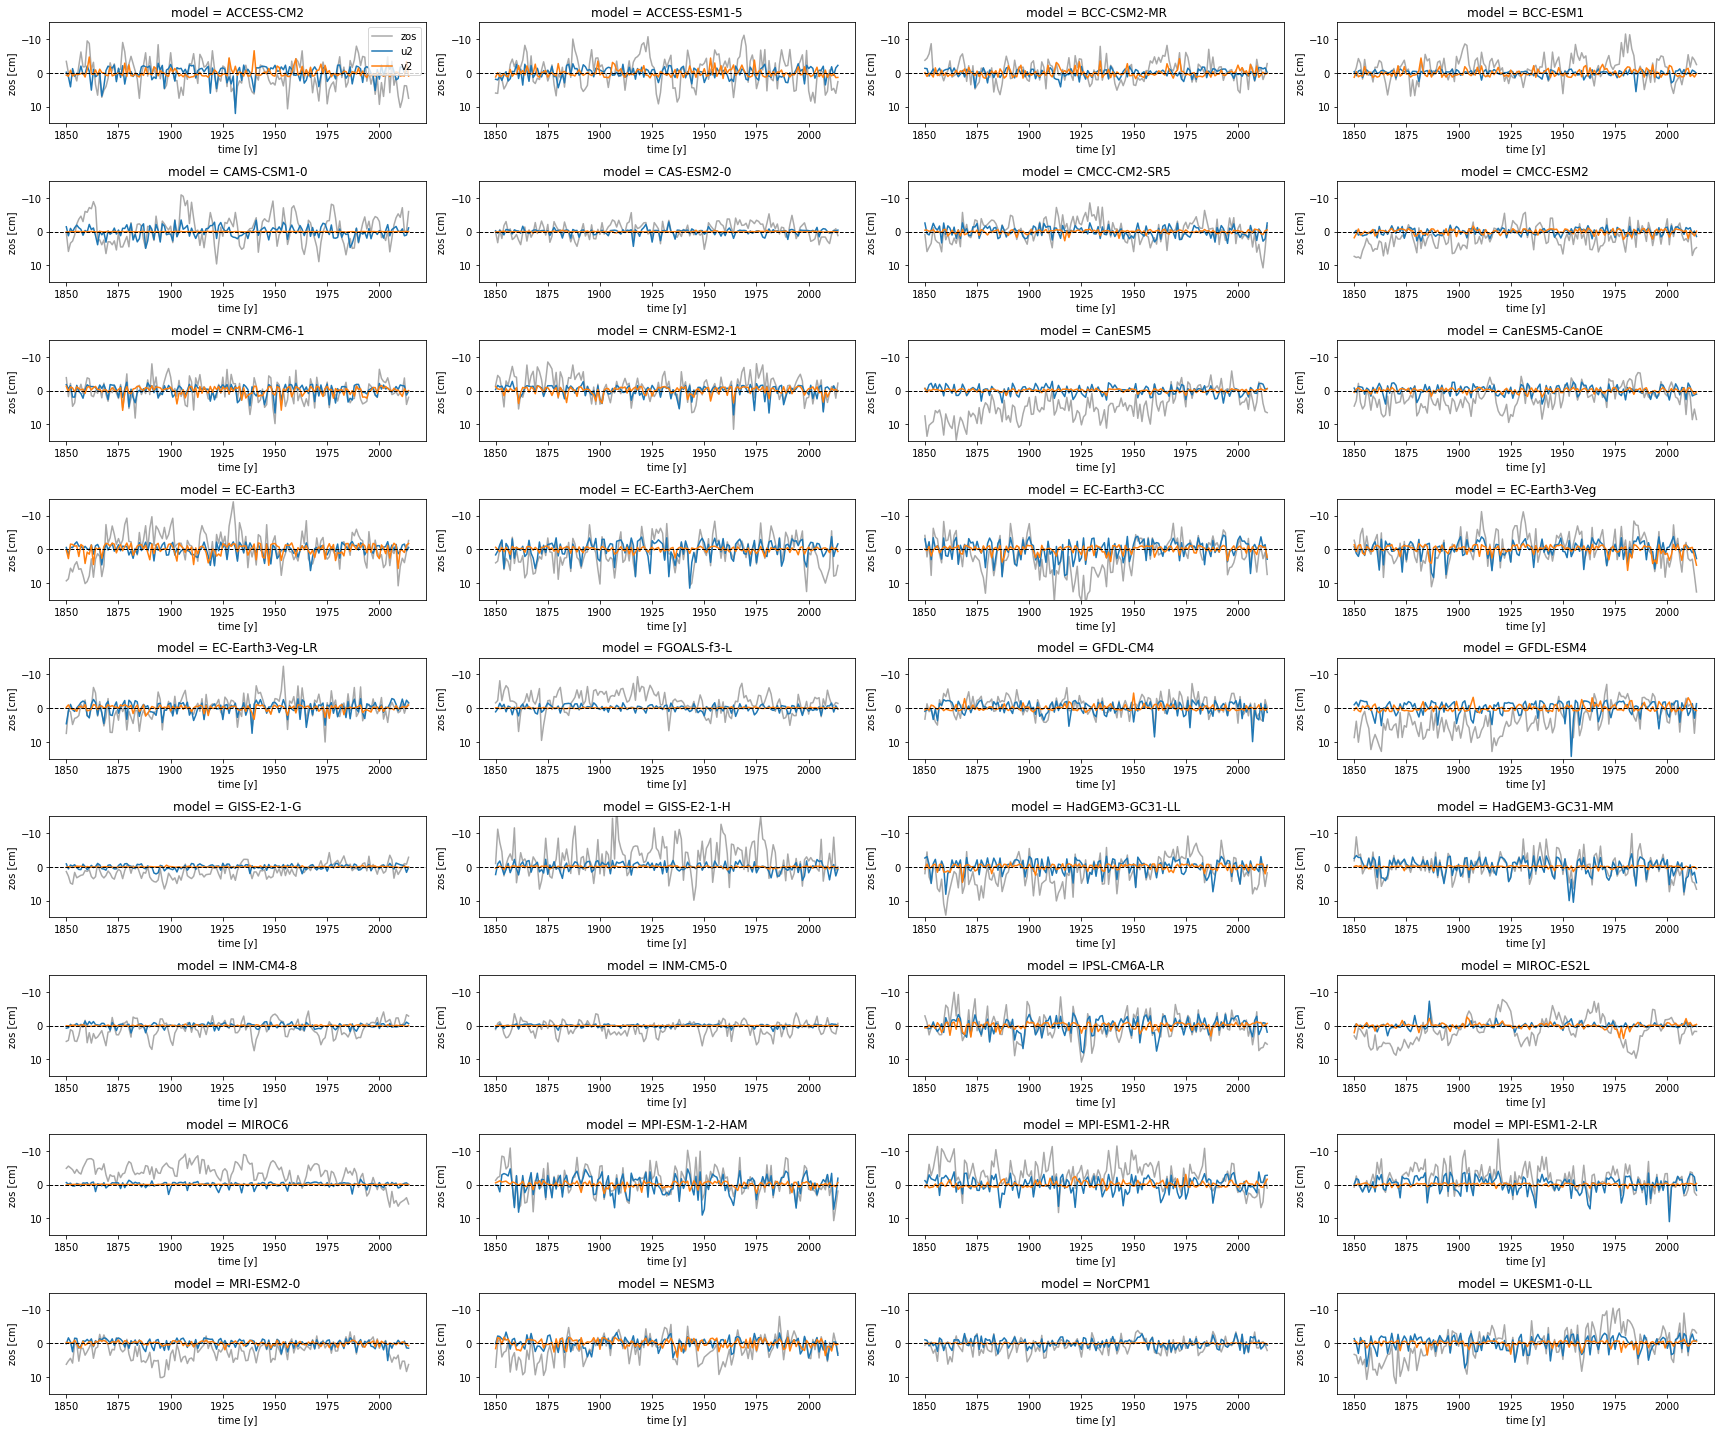

In [153]:
labels = ['u2', 'v2']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

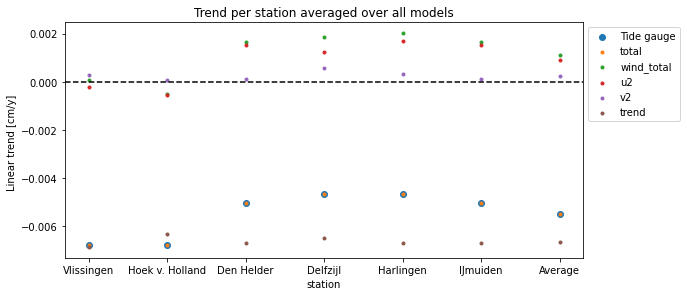

In [155]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2', 'v2', 'trend'], model, data_type, errorbar = False)